In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
temp = 3.0
df = pd.read_csv('results/exact_vs_approx.csv')
df = df[df.temperature == temp]
small = df[df.iters == 10000]
exact = small[small.oracle == 'exact'].groupby('measurements')
approx = small[small.oracle == 'approx'].groupby('measurements')
approx2 = small[small.oracle == 'approx2'].groupby('measurements')
approx3 = small[small.oracle == 'pairwise'].groupby('measurements')

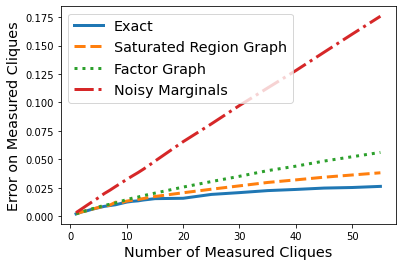

In [5]:
exact.error_in.mean().plot(linewidth=3, style='-', label='Exact')
#approx2.error_in.mean().plot(linewidth=3, label='Over-Saturated Region Graph')
approx.error_in.mean().plot(linewidth=3, style='--', label='Saturated Region Graph')
approx3.error_in.mean().plot(linewidth=3, style=':', label='Factor Graph')
exact.baseline_in.mean().plot(linewidth=3, style='-.', label='Noisy Marginals')
plt.xlabel('Number of Measured Cliques', fontsize='x-large')
plt.ylabel('Error on Measured Cliques', fontsize='x-large')
plt.legend(fontsize='x-large')
#plt.title('Temperature = %.1f' % temp, fontsize='x-large')
plt.savefig('exact_vs_approx1.pdf')

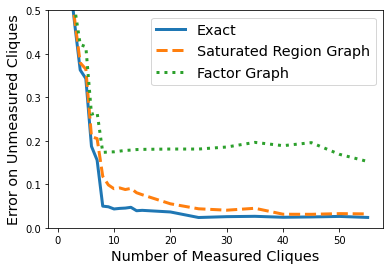

In [6]:
exact.error_out.mean().plot(linewidth=3, style='-', label='Exact')
#approx2.error_out.mean().plot(linewidth=3, label='Over-Saturated Region Graph')
approx.error_out.mean().plot(linewidth=3, style='--', label='Saturated Region Graph')
approx3.error_out.mean().plot(linewidth=3, style=':', label='Factor Graph')
plt.xlabel('Number of Measured Cliques', fontsize='x-large')
plt.ylabel('Error on Unmeasured Cliques', fontsize='x-large')
plt.legend(fontsize='x-large')
#plt.title('Temperature = %.1f' % temp, fontsize='x-large')
plt.ylim(0,0.5)
#plt.yscale('log')
plt.savefig('exact_vs_approx2.pdf')

Text(0.5, 1.0, 'Temperature = 3.0')

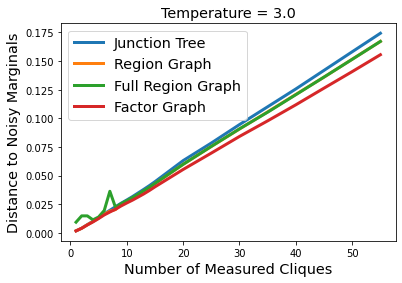

In [33]:
exact.dist_noisy.mean().plot(linewidth=3, label='Junction Tree')
approx.dist_noisy.mean().plot(linewidth=3, label='Region Graph')
approx2.dist_noisy.mean().plot(linewidth=3, label='Full Region Graph')
approx3.dist_noisy.mean().plot(linewidth=3, label='Factor Graph')
plt.xlabel('Number of Measured Cliques', fontsize='x-large')
plt.ylabel('Distance to Noisy Marginals', fontsize='x-large')
plt.legend(fontsize='x-large')
plt.title('Temperature = %.1f' % temp, fontsize='x-large')

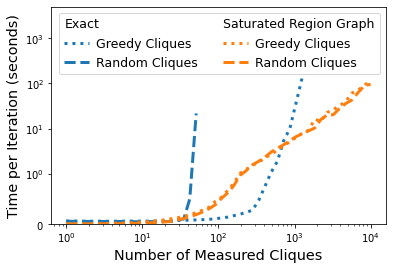

In [7]:
df = pd.read_csv('results/exact_vs_approx_large.csv').sort_values('measurements')
exact = df.oracle == 'exact'
greedy = df.selection == 'greedy'

exact_greedy = df[exact & greedy]
approx_greedy = df[~exact & greedy]
exact_random = df[exact & ~greedy]
approx_random = df[~exact & ~greedy]

mapping = { 'exact': 'Exact', 'approx': 'Saturated Region Graph', 'greedy': 'Greedy Cliques', 'random': 'Random Cliques'}

colors = {'exact':'C0', 'approx': 'C1'}
markers = { 'greedy': 'o', 'random': 's'}
styles = { 'greedy': ':', 'random': '--' }

for oracle in ['exact','approx']:
    plt.plot([],[], 'k ', label=mapping[oracle])
    for selection in ['greedy','random']:
        label = '%s: %s' % (mapping[oracle], mapping[selection])
        label = '        '+mapping[selection]
        tmp = df[(df.oracle == oracle) & (df.selection == selection)]
        plt.plot(tmp.measurements, tmp.time/tmp.iters, styles[selection], color=colors[oracle], markersize=4, linewidth=3, label=label)

#plt.plot(exact_greedy.measurements, exact_greedy.time/exact_greedy.iters, 'o-', linewidth=3)
#plt.plot(approx_greedy.measurements, approx_greedy.time/approx_greedy.iters, 'o-', linewidth=3)
#plt.plot(exact_random.measurements, exact_random.time/exact_random.iters, 'o-', linewidth=3)
#plt.plot(approx_random.measurements, approx_random.time/approx_random.iters, 'o-', linewidth=3)
plt.xscale('log')
plt.yscale('symlog', linthresh=1)
plt.ylim(0,5000)
plt.legend(fontsize=12.5, ncol=2, handletextpad=-2)
#plt.yscale('log')
#plt.loglog()
plt.xlabel('Number of Measured Cliques', fontsize='x-large')
plt.ylabel('Time per Iteration (seconds)', fontsize='x-large')
plt.savefig('exact_vs_approx3.pdf')

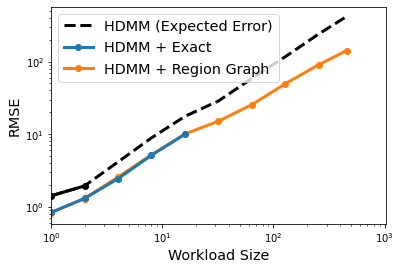

In [36]:
df0 = pd.read_csv('results/hdmm_new.csv').sort_values('workload')
df0['observed rmse'] = np.sqrt(df0['observed error'] / df0['queries'])
exact0 = df0[df0.oracle == 'exact']
approx0 = df0[df0.oracle == 'convex']
df = df0.groupby(['workload','oracle'])[['expected error','observed error','queries']].mean().reset_index()
df['expected rmse'] = np.sqrt(df['expected error'] / df['queries'])
df['observed rmse'] = np.sqrt(df['observed error'] / df['queries'])
exact = df[df.oracle == 'exact']
approx = df[df.oracle == 'convex']

plt.plot(approx.workload[:2], approx['expected rmse'][:2], '-ok', linewidth=3)
plt.plot(approx.workload, approx['expected rmse'], '--k', linewidth=3, label='HDMM (Expected Error)')
plt.plot(approx0.workload, approx0['observed rmse'], '.', color='C1', alpha=0.2)
plt.plot(exact0.workload, exact0['observed rmse'], '.', color='C0', alpha=0.2)
plt.plot(approx.workload, approx['observed rmse'], 'o-', color='C1', linewidth=3, label='HDMM + Region Graph')
plt.plot(exact.workload, exact['observed rmse'], 'o-', color='C0', linewidth=3, label='HDMM + Exact')
plt.xlim(1,1024)
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize='x-large')
#plt.legend(fontsize='large')
plt.xlabel('Workload Size', fontsize='x-large')
plt.ylabel('RMSE', fontsize='x-large')
plt.loglog()
plt.savefig('hdmm.pdf')

In [21]:
approx0

,workload,oracle,iters,epsilon,delta,restarts,seed,expected error,observed error,queries,observed rmse


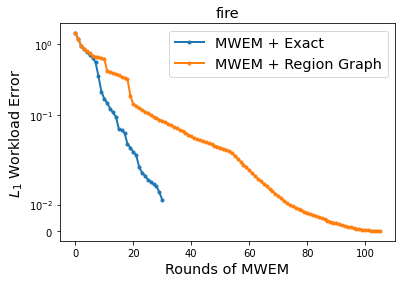

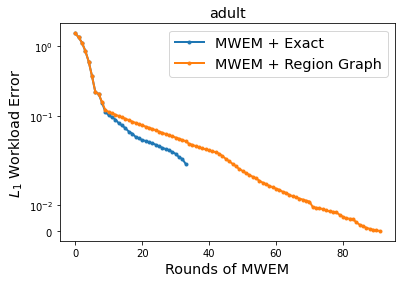

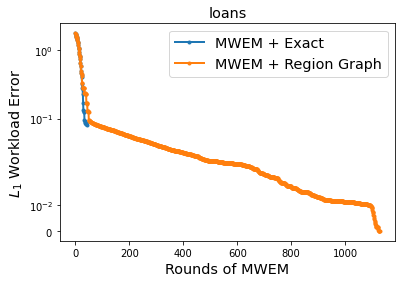

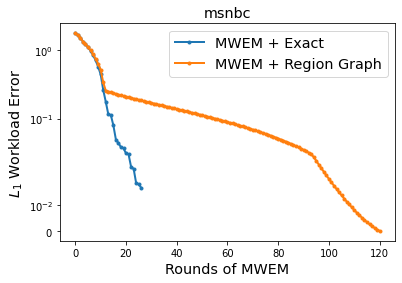

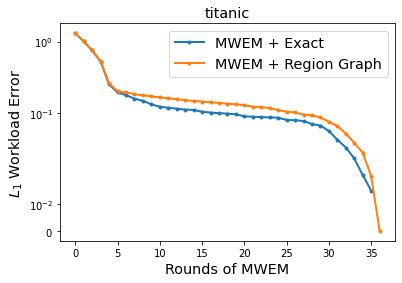

In [72]:
for name in ['fire', 'adult','loans','msnbc','titanic']:
    approx = pd.read_csv('results/mwem-no-noise-%s_approx.out'%name,header=None,names=['round', 'cl', 'mem', 'err'])
    exact = pd.read_csv('results/mwem-no-noise-%s_exact.out'%name, header=None,names=['round', 'cl', 'mem', 'err'])
    fig = plt.figure()
    plt.plot(exact.err, '.-', linewidth=2, label='MWEM + Exact')
    plt.plot(approx.err, '.-', linewidth=2, label='MWEM + Region Graph')
    plt.legend(fontsize='x-large')
    plt.xlabel('Rounds of MWEM', fontsize='x-large')
    plt.ylabel('$L_1$ Workload Error', fontsize='x-large')
    plt.yscale('symlog', linthresh=3e-2)
    #plt.ylim(0,0.1)
    plt.title(name, fontsize='x-large')
    plt.savefig('mwem-%s.pdf' % name)
    plt.show()

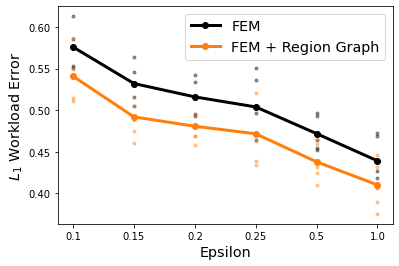

In [37]:
df = pd.read_csv('results/fem2.csv')
plt.plot(df.epsilon.astype(str), df.FEM_L1, '.', color='k', alpha=0.4, linewidth=3)
plt.plot(df.epsilon.astype(str), df.PGM_L1, '.', color='C1', alpha=0.4, linewidth=3)
df = df.groupby('epsilon').mean()
idx = np.arange(df.index.shape[0])
plt.plot(df.index.astype(str), df.FEM_L1, 'o-', color='k', linewidth=3, label='FEM')
plt.plot(df.index.astype(str), df.PGM_L1, 'o-', color='C1', linewidth=3, label='FEM + Region Graph')
plt.xlabel('Epsilon', fontsize='x-large')
plt.ylabel('$L_1$ Workload Error', fontsize='x-large')
plt.legend(fontsize='x-large')
plt.savefig('fem_l1.pdf')

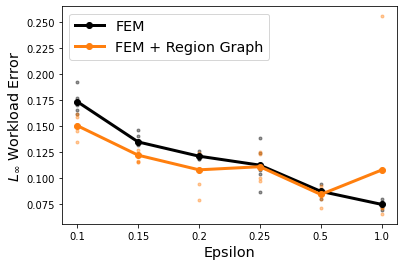

In [38]:
df = pd.read_csv('results/fem2.csv')
plt.plot(df.epsilon.astype(str), df.FEM_Linf, '.', color='k', alpha=0.4, linewidth=3)
plt.plot(df.epsilon.astype(str), df.PGM_Linf, '.', color='C1', alpha=0.4, linewidth=3)
df = df.groupby('epsilon').mean()
idx = np.arange(df.index.shape[0])
plt.plot(df.index.astype(str), df.FEM_Linf, 'o-', color='k', linewidth=3, label='FEM')
plt.plot(df.index.astype(str), df.PGM_Linf, 'o-', color='C1', linewidth=3, label='FEM + Region Graph')
plt.xlabel('Epsilon', fontsize='x-large')
plt.ylabel('$L_{\infty}$ Workload Error', fontsize='x-large')
plt.legend(fontsize='x-large')
plt.savefig('fem_linf.pdf')

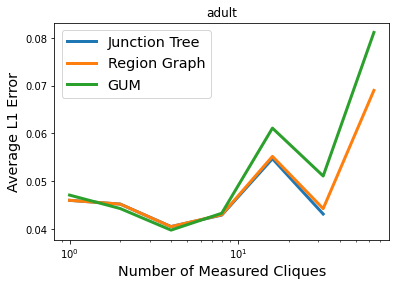

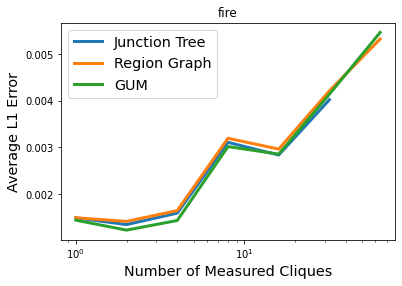

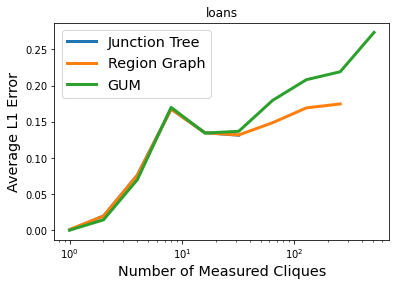

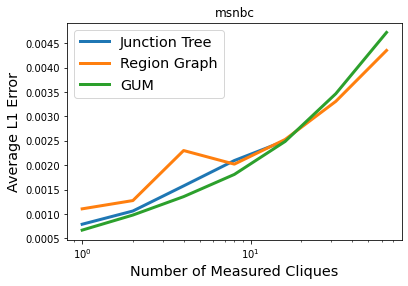

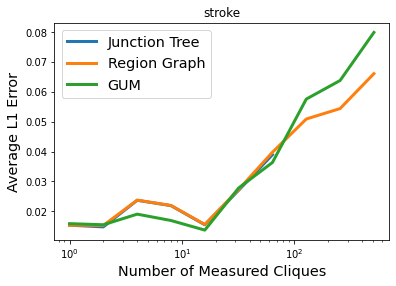

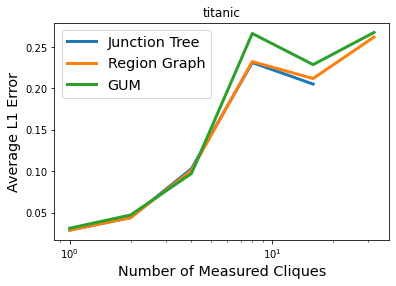

In [15]:
df = pd.read_csv('results/gum2.csv').sort_values('measurements')
df = df[df.kway == 2]
df = df[df.epsilon == 1]
for name, group in df.groupby('dataset'):
    exact = group[group.oracle == 'exact']
    approx = group[group.oracle == 'convex']
    gum = group[group.oracle == 'gum']
    plt.plot(exact.measurements, exact.error, linewidth=3, label='Junction Tree')
    plt.plot(approx.measurements, approx.error, linewidth=3, label='Region Graph')
    plt.plot(gum.measurements, gum.error, linewidth=3, label='GUM')
    #plt.plot(approx.measurements, approx.noisy_error, linewidth=3, label='Noisy Marginals')
    plt.title(name)
    plt.legend(fontsize='x-large')
    plt.xlabel('Number of Measured Cliques', fontsize='x-large')
    plt.ylabel('Average L1 Error', fontsize='x-large')
    plt.xscale('log')
    plt.show()

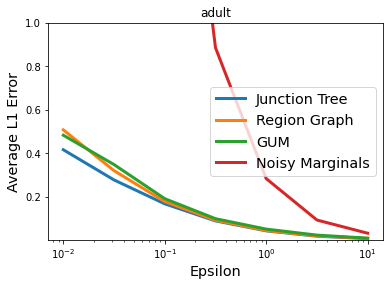

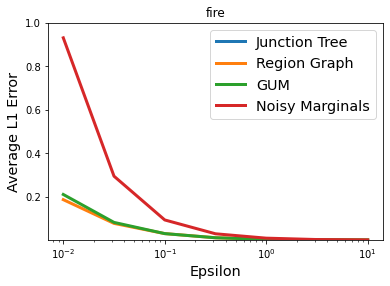

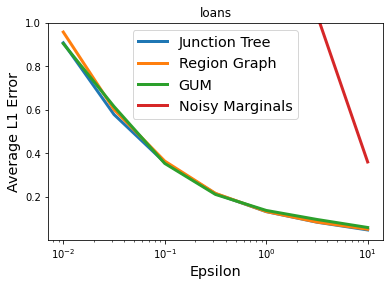

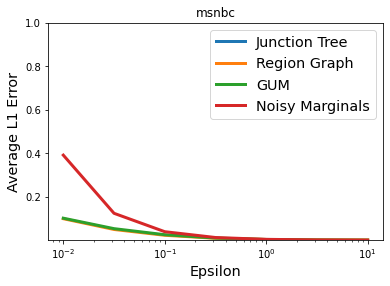

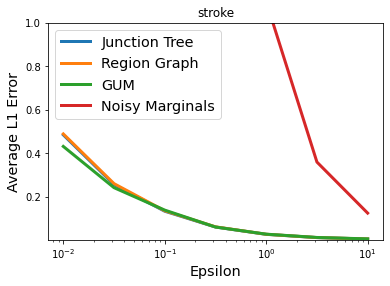

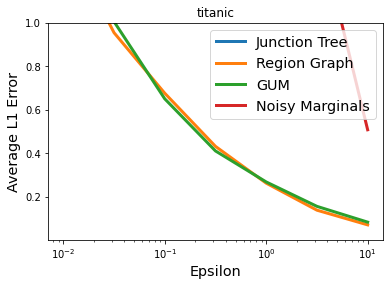

In [27]:
df = pd.read_csv('results/gum2.csv').sort_values('epsilon')
df = df[df.kway == 2]
df = df[df.measurements == 32]
for name, group in df.groupby('dataset'):
    exact = group[group.oracle == 'exact']
    approx = group[group.oracle == 'convex']
    gum = group[group.oracle == 'gum']
    plt.plot(exact.epsilon, exact.error, linewidth=3, label='Junction Tree')
    plt.plot(approx.epsilon, approx.error, linewidth=3, label='Region Graph')
    plt.plot(gum.epsilon, gum.error, linewidth=3, label='GUM')
    plt.plot(approx.epsilon, approx.noisy_error, linewidth=3, label='Noisy Marginals')
    plt.title(name)
    plt.legend(fontsize='x-large')
    plt.xlabel('Epsilon', fontsize='x-large')
    plt.ylabel('Average L1 Error', fontsize='x-large')
    plt.ylim(1e-3, 1.0)
    plt.xscale('log')
    #plt.loglog()
    plt.show()

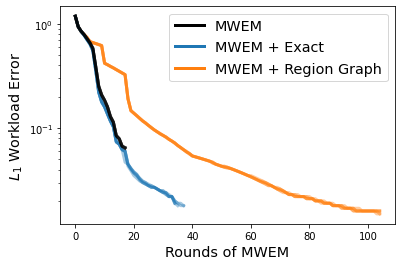

In [42]:
names = ['round','clique','mem', 'time1', 'time2', 'time3', 'err']
seeds = [2457026461, 2643031147, 2094276510, 2378741324, 1961979125]
eps = 0.1

colors = {'MW':'k', 'MB-exact': 'C0', 'MB-convex': 'C1'}

for oracle in ['MB-convex', 'MB-exact', 'MW']:
    c = colors[oracle]
    for seed in seeds:
        df = pd.read_csv('results/mwem_fire_%s_%.3f_%d.out' % (oracle, eps, seed), names=names)
        plt.plot(df['round'], df.err, c, linewidth=3, alpha=0.4)

#df1 = pd.read_csv('results/mwem_fire_MB-convex_0.100_1961979125.out', names=names)
#df2 = pd.read_csv('results/mwem_fire_MB-exact_0.100_1961979125.out', names=names)
#df3 = pd.read_csv('results/mwem_fire_MW_0.100_1961979125.out', names=names)
#plt.plot(df1['round'], df1.err, linewidth=3, label='MWEM + Region Graph')
#plt.plot(df4['round'], df4.err, linewidth=3, label='MWEM + Region Graph')
#plt.plot(df2['round'], df2.err, linewidth=3, label='MWEM + Junction Tree')
#plt.plot(df3['round'], df3.err, linewidth=3, label='MWEM')
plt.plot([],[], colors['MW'], linewidth=3, label='MWEM')
plt.plot([],[], colors['MB-exact'], linewidth=3, label='MWEM + Exact')
plt.plot([],[], colors['MB-convex'], linewidth=3, label='MWEM + Region Graph')
plt.xlabel('Rounds of MWEM', fontsize='x-large')
plt.ylabel('$L_1$ Workload Error', fontsize='x-large')
plt.yscale('log')
plt.legend(fontsize='x-large')
plt.savefig('mwem.pdf')

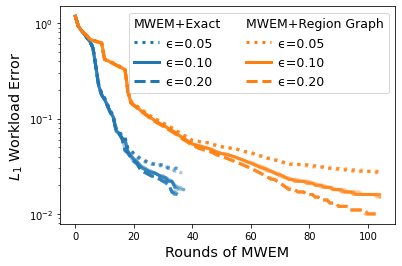

In [64]:
names = ['round','clique','mem', 'time1', 'time2', 'time3', 'err']
seeds = [2457026461, 2643031147, 2094276510, 2378741324, 1961979125]
eps = 0.1

colors = {'MW':'k', 'MB-exact': 'C0', 'MB-convex': 'C1'}
styles = { 0.05: ':', 0.1:'-', 0.2:'--'}

mapping = {'MB-exact': 'MWEM+Exact', 'MB-convex': 'MWEM+Region Graph'}

for oracle in ['MB-exact','MB-convex']:
    plt.plot([],[], 'k ', label=mapping[oracle])
    for eps in [0.05, 0.1, 0.2]:
        c = colors[oracle]
        for seed in seeds:
            df = pd.read_csv('results/mwem_fire_%s_%.3f_%d.out' % (oracle, eps, seed), names=names)
            plt.plot(df['round'], df.err, styles[eps], color=c, linewidth=3, alpha=0.4)
        plt.plot([], [], styles[eps], color=colors[oracle], linewidth=3, label='        ϵ=%.2f'%eps)

#df1 = pd.read_csv('results/mwem_fire_MB-convex_0.100_1961979125.out', names=names)
#df2 = pd.read_csv('results/mwem_fire_MB-exact_0.100_1961979125.out', names=names)
#df3 = pd.read_csv('results/mwem_fire_MW_0.100_1961979125.out', names=names)
#plt.plot(df1['round'], df1.err, linewidth=3, label='MWEM + Region Graph')
#plt.plot(df4['round'], df4.err, linewidth=3, label='MWEM + Region Graph')
#plt.plot(df2['round'], df2.err, linewidth=3, label='MWEM + Junction Tree')
#plt.plot(df3['round'], df3.err, linewidth=3, label='MWEM')
#plt.plot([],[], colors['MW'], linewidth=3, label='MWEM')
#plt.plot([],[], colors['MB-exact'], linewidth=3, label='MWEM + Exact')
#plt.plot([],[], colors['MB-convex'], linewidth=3, label='MWEM + Region Graph')
plt.xlabel('Rounds of MWEM', fontsize='x-large')
plt.ylabel('$L_1$ Workload Error', fontsize='x-large')
plt.yscale('log')
#plt.legend(fontsize='x-large', ncol=2)
plt.legend(fontsize=12.5, ncol=2, handletextpad=-2)
plt.savefig('mwem2.pdf')

In [132]:
df = pd.read_csv('results/gum3.csv')
df2 = df.copy()
df2['oracle'] = 'none'
df2['error'] = df2['noisy_error']
df = pd.concat([df,df2])
groups = df.groupby(['epsilon','oracle']).error
mu = groups.mean().unstack()
std = groups.std().unstack()
ans = '/texttt{/footnotesize{' + mu.round(4).astype(str) + ' pm ' + std.round(4).astype(str) + '}}'
ans.index = '/texttt{/footnotesize{' + ans.index.astype(str) + '}}'
print(ans[['exact','convex','gum','none']].to_latex())

\begin{tabular}{lllll}
\toprule
oracle &                                     exact &                                    convex &                                       gum &                                       none \\
epsilon                                    &                                           &                                           &                                           &                                            \\
\midrule
/texttt\{/footnotesize\{0.01\}\}               &  /texttt\{/footnotesize\{0.4375 pm 0.0245\}\} &   /texttt\{/footnotesize\{0.563 pm 0.0344\}\} &  /texttt\{/footnotesize\{0.5229 pm 0.0202\}\} &  /texttt\{/footnotesize\{28.0779 pm 0.1047\}\} \\
/texttt\{/footnotesize\{0.0316227766016837\}\} &  /texttt\{/footnotesize\{0.2848 pm 0.0081\}\} &    /texttt\{/footnotesize\{0.3277 pm 0.01\}\} &  /texttt\{/footnotesize\{0.3525 pm 0.0078\}\} &   /texttt\{/footnotesize\{8.8773 pm 0.0243\}\} \\
/texttt\{/footnotesize\{0.1\}\}                &  /texttt\{/foo

In [126]:
df2 = df.copy()
df2['oracle'] = 'none']
df2['error'] = df2['noisy_error']
df = pd.concat([df,df2])

,oracle,dataset,iters,measurements,kway,epsilon,seed,noisy_error,error,time
0,gum,adult,10000.0,32.0,2.0,0.100000,0.0,2.817466,0.195611,63.291141
1,gum,adult,10000.0,32.0,2.0,0.316228,0.0,0.894451,0.102108,63.543027
2,gum,adult,10000.0,32.0,2.0,0.031623,0.0,8.880525,0.351983,63.279455
3,gum,adult,10000.0,32.0,2.0,0.010000,0.0,27.973321,0.542936,64.023058
4,gum,adult,10000.0,32.0,2.0,31.622777,0.0,0.012502,0.004016,57.956721
...,...,...,...,...,...,...,...,...,...,...
130,exact,adult,10000.0,32.0,2.0,10.000000,0.0,0.032429,0.007294,18356.628478
131,exact,adult,10000.0,32.0,2.0,1.000000,0.0,0.285384,0.043622,18363.441470
132,exact,adult,10000.0,32.0,2.0,0.316228,0.0,0.888619,0.090267,18463.509489
133,exact,adult,10000.0,32.0,2.0,0.010000,0.0,28.191180,0.466146,18525.900972


In [87]:
df

oracle,convex,exact,gum
epsilon,,,
0.010000,0.562971,0.437498,0.522866
0.031623,0.327667,0.284849,0.352453
0.100000,0.178760,0.172429,0.196474
0.316228,0.093083,0.090769,0.100658
1.000000,0.044703,0.043318,0.050976
3.162278,0.019850,0.018699,0.022937
10.000000,0.008695,0.007383,0.009501
31.622777,0.004498,0.003714,0.004013
100.000000,0.003231,0.002691,0.001769
